# Graduate Admissions Dataset



## Context
__This dataset is created for prediction of Graduate Admissions from an Indian perspective.__

### Content

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are : 

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose 
5. Letter of Recommendation Strength ( out of 5 )
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )


__Let load the necessary library in the Notebook__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import RidgeCV
# from sklearn.linear_model import LassoCV

In [2]:
df = pd.read_csv('../input/graduate-admissions/Admission_Predict_Ver1.1.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

**Duplicted Data or not**

In [7]:
df.duplicated().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.isnull().sum()

In [8]:
df.drop(columns=['Serial No.'], inplace=True)

In [10]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [11]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [13]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=34)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled

array([[0.48      , 0.55555556, 0.5       , ..., 0.57142857, 0.43648208,
        0.        ],
       [0.22      , 0.25925926, 0.5       , ..., 0.42857143, 0.40390879,
        0.        ],
       [0.26      , 0.22222222, 0.5       , ..., 0.28571429, 0.28013029,
        0.        ],
       ...,
       [0.34      , 0.44444444, 0.25      , ..., 0.85714286, 0.42996743,
        1.        ],
       [0.4       , 0.48148148, 0.75      , ..., 0.28571429, 0.50814332,
        0.        ],
       [0.52      , 0.37037037, 0.5       , ..., 0.14285714, 0.28664495,
        0.        ]])

In [22]:
import tensorflow
from tensorflow import keras
from keras import Sequential

from keras.layers import Dense

Using TensorFlow backend.


In [48]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
#model.add(Dense(7, activation='relu'))
model.add(Dense(1,activation='linear'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_11 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 8         
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [51]:
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

Train on 320 samples, validate on 80 samples
Epoch 1/200
320/320 [==============================] - 0s 426us/step - loss: 0.2904 - val_loss: 0.2423
Epoch 2/200
320/320 [==============================] - 0s 54us/step - loss: 0.2064 - val_loss: 0.1694
Epoch 3/200
320/320 [==============================] - 0s 51us/step - loss: 0.1400 - val_loss: 0.1124
Epoch 4/200
320/320 [==============================] - 0s 50us/step - loss: 0.0903 - val_loss: 0.0716
Epoch 5/200
320/320 [==============================] - 0s 53us/step - loss: 0.0558 - val_loss: 0.0442
Epoch 6/200
320/320 [==============================] - 0s 54us/step - loss: 0.0344 - val_loss: 0.0278
Epoch 7/200
320/320 [==============================] - 0s 50us/step - loss: 0.0231 - val_loss: 0.0186
Epoch 8/200
320/320 [==============================] - 0s 49us/step - loss: 0.0168 - val_loss: 0.0138
Epoch 9/200
320/320 [==============================] - 0s 53us/step - loss: 0.0135 - val_loss: 0.0119
Epoch 10/200
320/320 [==============

In [52]:
y_pred = model.predict(X_test_scaled)

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8083387459207302

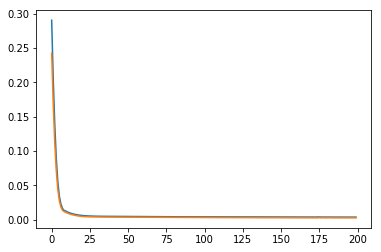

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])